This notebook contains various interpolation methods.

https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

Date Created: 19 Feb 2019
<br>
Last Modified: 21 Feb 2019
<br>
Humans Responsible: Prickly Pythons

In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from scipy import interpolate

# 1-D

In [7]:
# Make some data points
x = np.arange(0, 10, 0.5)
y = np.sin(x**2)

# Define a finer grid 
x_fine = np.arange(0, 10, 0.05)

# The true function sampled with the finer grid
y_fine = np.sin(x_fine**2)

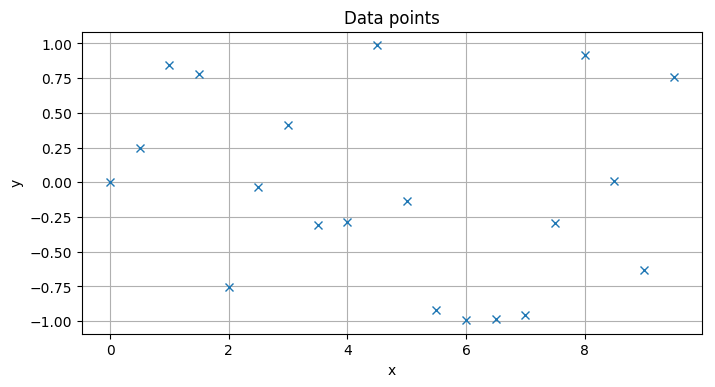

In [8]:
plt.figure(figsize=(8,4))
plt.plot(x, y, 'x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.grid()

plt.show()

## Linear 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

In [9]:
f_lin = interpolate.interp1d(x, y, kind='linear', fill_value="extrapolate")

In [10]:
f_lin

In [11]:
y_lin = f_lin(x_fine)

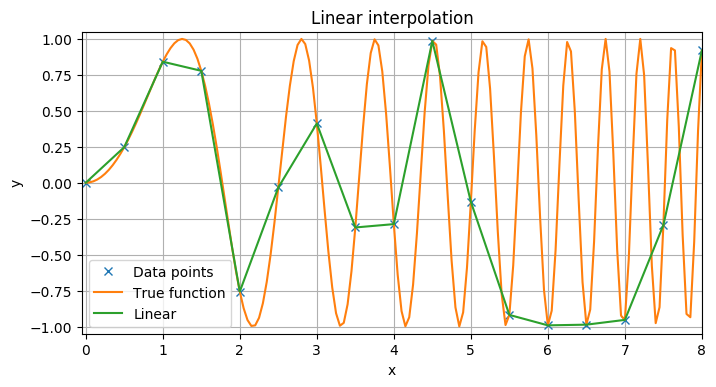

In [12]:
plt.figure(figsize=(8,4))
plt.plot(x, y, 'x', label='Data points')
plt.plot(x_fine, y_fine, label='True function')

plt.plot(x_fine, y_lin, label='Linear')

plt.legend(loc='best')
plt.axis([-0.05, 8, -1.05, 1.05])
plt.title('Linear interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

## Spline
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev

In [13]:
# Compute a spline representation
spline_rep = interpolate.splrep(x, y, k=3, s=0) # k=3 => cubic, s=0 => no smoothing

y_sp = interpolate.splev(x_fine, spline_rep, der=0)

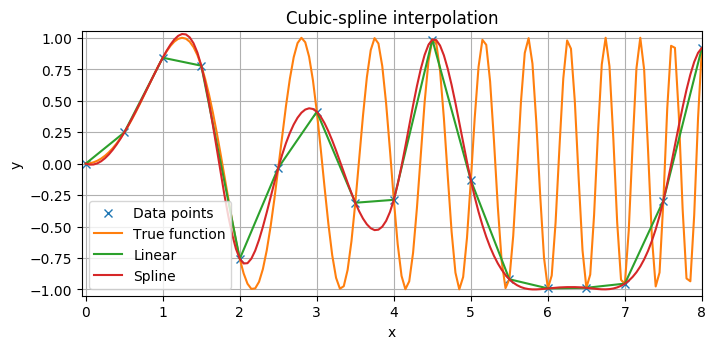

In [14]:
plt.figure(figsize=(8,3.5))
plt.plot(x, y, 'x', label='Data points')
plt.plot(x_fine, y_fine, label='True function')

plt.plot(x_fine, y_lin, label='Linear')
plt.plot(x_fine, y_sp, label='Spline')

plt.legend()
plt.axis([-0.05, 8, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# N-D

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp2d.html

In [15]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)

xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2 + yy**2)

f = interpolate.interp2d(x, y, z, kind='linear')

In [16]:
f

In [17]:
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)

znew = f(xnew, ynew)

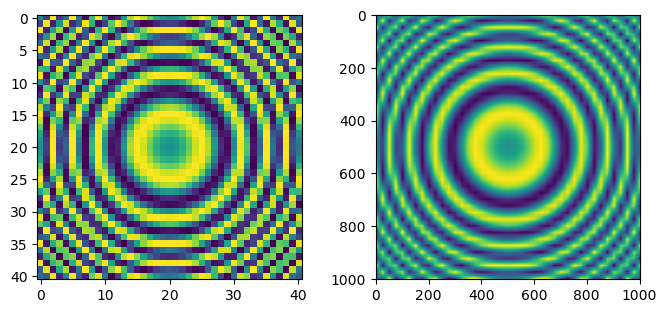

In [18]:
fig = plt.figure(figsize=(8,3.5))
ax1 = fig.add_subplot(121)
ax1.imshow(z, interpolation='nearest')

ax2 = fig.add_subplot(122)
ax2.imshow(znew, interpolation='nearest')

plt.show()

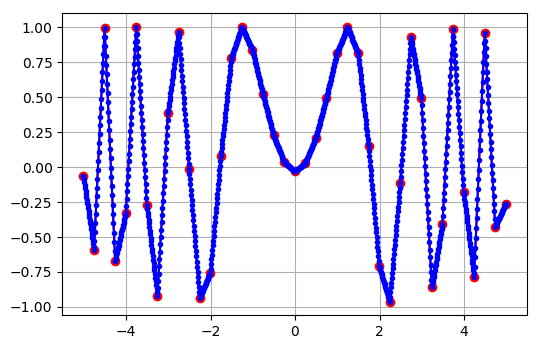

In [19]:
plt.plot(x, z[0, :], 'ro-', label='original')
plt.plot(xnew, znew[0, :], 'b.-', label='')
plt.grid()

plt.show()

https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html

# Gaussian process regression (kriging)
https://en.wikipedia.org/wiki/Kriging

The example below is from:
<br>
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(17)

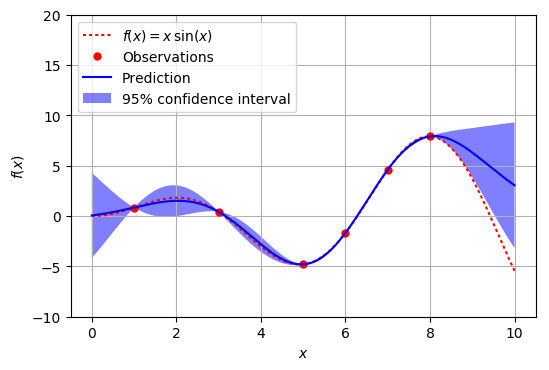

In [24]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)


X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.grid()
plt.show()